<a href="https://colab.research.google.com/github/alibigdelou/st/blob/main/SpecialTopic_SA_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the 'yelp_review_full' dataset from Hugging Face
dataset_yelp = load_dataset('yelp_review_full')

# Convert the 'train' split to a pandas DataFrame
df_yelp_train = pd.DataFrame(dataset_yelp['train'])

# Convert the 'test' split to a pandas DataFrame
df_yelp_test = pd.DataFrame(dataset_yelp['test'])

# Print the shape of both DataFrames
print(f"Shape of df_yelp_train: {df_yelp_train.shape}")
print(f"Shape of df_yelp_test: {df_yelp_test.shape}")

# Display the first 5 rows of df_yelp_train
print("\nFirst 5 rows of df_yelp_train:")
print(df_yelp_train.head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

yelp_review_full/train-00000-of-00001.pa(…):   0%|          | 0.00/299M [00:00<?, ?B/s]

yelp_review_full/test-00000-of-00001.par(…):   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shape of df_yelp_train: (650000, 2)
Shape of df_yelp_test: (50000, 2)

First 5 rows of df_yelp_train:
   label                                               text
0      4  dr. goldberg offers everything i look for in a...
1      1  Unfortunately, the frustration of being Dr. Go...
2      3  Been going to Dr. Goldberg for over 10 years. ...
3      3  Got a letter in the mail last week that said D...
4      0  I don't know what Dr. Goldberg was like before...


# Mapping Data

In [ ]:
import pandas as pd

# Function to map numerical labels to binary sentiment labels
def map_sentiment(label):
    # Original labels are 0-indexed: 0=1 star, 1=2 stars, 2=3 stars, 3=4 stars, 4=5 stars
    # Negative: 1 or 2 stars (original labels 0, 1)
    # Positive: 3, 4, or 5 stars (original labels 2, 3, 4)
    if label <= 1: # Corresponds to 1 or 2 stars
        return 'negative'
    else: # Corresponds to 3, 4, or 5 stars
        return 'positive'

# Apply the mapping to create a new 'sentiment_label' column in both dataframes
df_yelp_train['sentiment_label'] = df_yelp_train['label'].apply(map_sentiment)
df_yelp_test['sentiment_label'] = df_yelp_test['label'].apply(map_sentiment)

# Display the distribution of the new sentiment labels for training data
print("\nSentiment label distribution for training data:")
print(df_yelp_train['sentiment_label'].value_counts())

# Display the distribution of the new sentiment labels for testing data
print("\nSentiment label distribution for testing data:")
print(df_yelp_test['sentiment_label'].value_counts())

# Display the first 5 rows of df_yelp_train with the new sentiment label
print("\nFirst 5 rows of df_yelp_train with sentiment labels:")
print(df_yelp_train.head())


Sentiment label distribution for training data:
sentiment_label
positive    390000
negative    260000
Name: count, dtype: int64

Sentiment label distribution for testing data:
sentiment_label
positive    30000
negative    20000
Name: count, dtype: int64

First 5 rows of df_yelp_train with sentiment labels:
   label                                               text sentiment_label
0      4  dr. goldberg offers everything i look for in a...        positive
1      1  Unfortunately, the frustration of being Dr. Go...        negative
2      3  Been going to Dr. Goldberg for over 10 years. ...        positive
3      3  Got a letter in the mail last week that said D...        positive
4      0  I don't know what Dr. Goldberg was like before...        negative


# Stopwords


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

print("Libraries imported and NLTK stopwords downloaded.")

Libraries imported and NLTK stopwords downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


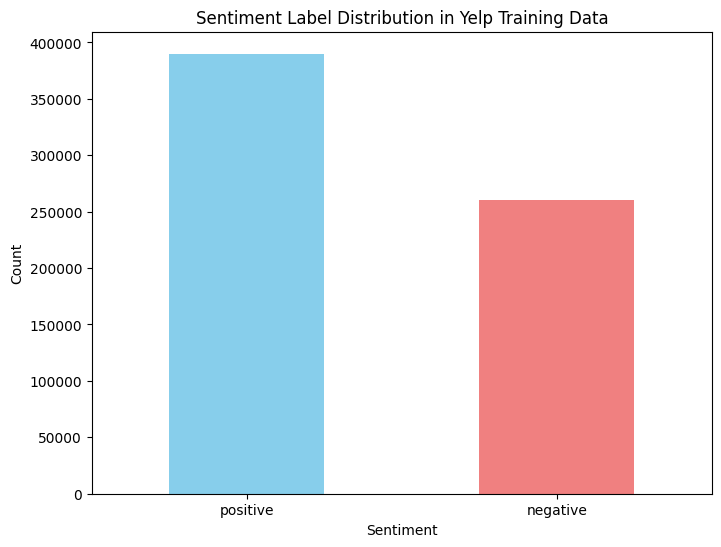

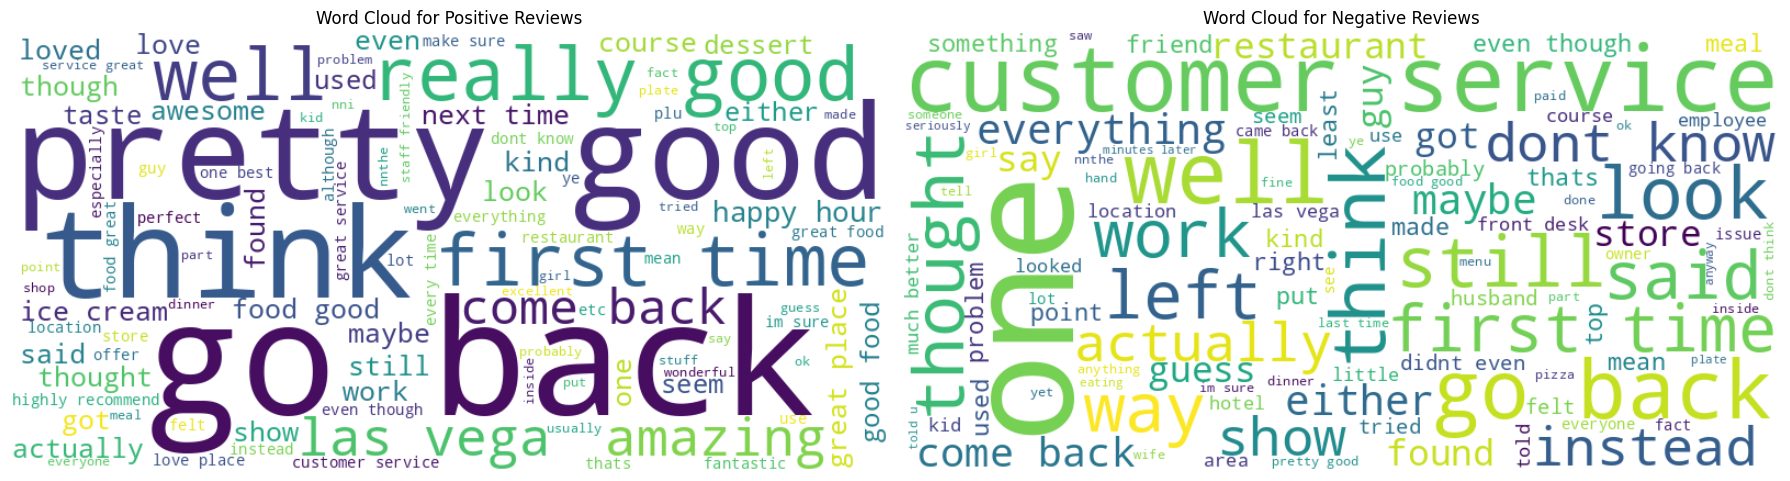


Most common words per sentiment class (after preprocessing and stop word removal):

Positive Reviews: [('good', 256296), ('place', 221716), ('food', 208644), ('great', 187702), ('like', 171314), ('get', 142715), ('one', 139918), ('time', 129023), ('really', 128501), ('service', 117919)]

Negative Reviews: [('food', 173122), ('place', 150504), ('like', 141452), ('get', 130277), ('would', 127817), ('one', 126991), ('good', 121405), ('service', 113054), ('time', 111894), ('back', 109777)]


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re # Import regex for cleaning text

# Create a set of English stopwords
english_stop_words = set(stopwords.words('english'))

# Define a preprocessing function
def preprocess_text_en(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in english_stop_words]
    return ' '.join(filtered_words)

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
df_yelp_train['sentiment_label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sentiment Label Distribution in Yelp Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Generate and display word clouds for each sentiment class
sentiment_classes = df_yelp_train['sentiment_label'].unique()

fig, axes = plt.subplots(1, len(sentiment_classes), figsize=(18, 8))
axes = axes.flatten() # Flatten in case there's only one class, for consistent indexing

for i, sentiment_label in enumerate(sentiment_classes):
    # Combine all preprocessed texts for this class
    class_texts = ' '.join(df_yelp_train[df_yelp_train['sentiment_label'] == sentiment_label]['text'].apply(preprocess_text_en))

    # Generate word cloud (no specific font path needed for English)
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate(class_texts)

    # Plot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Word Cloud for {sentiment_label.capitalize()} Reviews')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print most common words for each class after preprocessing
print("\nMost common words per sentiment class (after preprocessing and stop word removal):")
for sentiment_label in sentiment_classes:
    class_texts = ' '.join(df_yelp_train[df_yelp_train['sentiment_label'] == sentiment_label]['text'].apply(preprocess_text_en))
    words = class_texts.split()
    common_words = Counter(words).most_common(10)
    print(f"\n{sentiment_label.capitalize()} Reviews: {common_words}")


# Random classifier

Random Classifier Performance on Yelp Dataset
Accuracy: 0.4999
Precision: 0.5199
Recall: 0.4999
F1-Score: 0.5050

Classification Report
              precision    recall  f1-score   support

    positive       0.40      0.50      0.44     20000
    negative       0.60      0.50      0.55     30000

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.52      0.50      0.50     50000


Confusion Matrix
[[14998 15002]
 [10001  9999]]


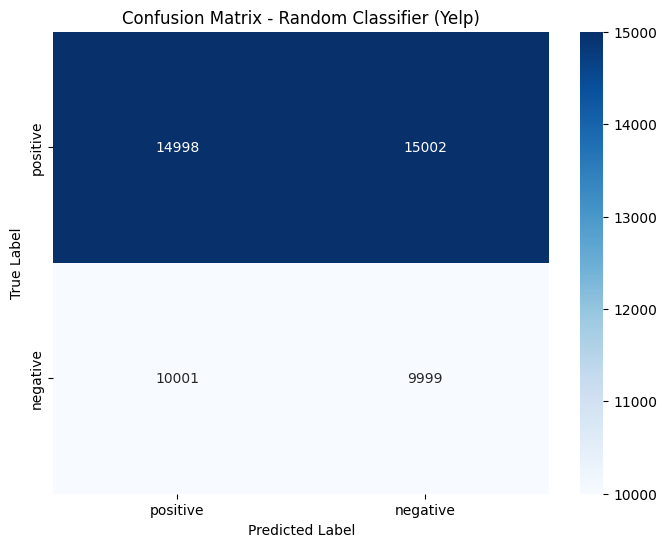


Class Distributions
True Class Distribution:
positive    30000
negative    20000
Name: count, dtype: int64

Predicted Class Distribution:
negative    25001
positive    24999
Name: count, dtype: int64

Sample Random Predictions
Text: Today my little sister was to take her driving test after school, which is a very small time frame b...
True Label: negative, Predicted Label: positive
Status: ✗ Incorrect
--------------------------------------------------
Text: Even as a gay guy, I can appreciate these beautiful women.  I thought the host was fine, though over...
True Label: positive, Predicted Label: negative
Status: ✗ Incorrect
--------------------------------------------------
Text: I love the Art Theatre. It plays a decent assortment of international films and indy films. The conc...
True Label: positive, Predicted Label: negative
Status: ✗ Incorrect
--------------------------------------------------
Text: As a restaurant owner, I am always looking for places to get food/supplies. Thi

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 2. Extract true labels for the test set
y_true_yelp = df_yelp_test['sentiment_label'].tolist()

# 3. Identify unique sentiment classes
classes_yelp = df_yelp_train['sentiment_label'].unique().tolist()

# 4. Generate random predictions for the test set
y_pred_random_yelp = [random.choice(classes_yelp) for _ in range(len(df_yelp_test))]

# 5. Calculate the accuracy, precision, recall, and F1-score
accuracy_yelp = accuracy_score(y_true_yelp, y_pred_random_yelp)
precision_yelp = precision_score(y_true_yelp, y_pred_random_yelp, average='weighted', zero_division=0)
recall_yelp = recall_score(y_true_yelp, y_pred_random_yelp, average='weighted', zero_division=0)
f1_yelp = f1_score(y_true_yelp, y_pred_random_yelp, average='weighted', zero_division=0)

# 6. Print the calculated evaluation metrics
print("="*60)
print("Random Classifier Performance on Yelp Dataset")
print("="*60)
print(f"Accuracy: {accuracy_yelp:.4f}")
print(f"Precision: {precision_yelp:.4f}")
print(f"Recall: {recall_yelp:.4f}")
print(f"F1-Score: {f1_yelp:.4f}")

# 7. Generate and print a classification report
print("\n" + "="*60)
print("Classification Report")
print("="*60)
print(classification_report(y_true_yelp, y_pred_random_yelp, target_names=classes_yelp, zero_division=0))

# 8. Calculate the confusion matrix
cm_yelp = confusion_matrix(y_true_yelp, y_pred_random_yelp, labels=classes_yelp)

# 9. Print the confusion matrix
print("\n" + "="*60)
print("Confusion Matrix")
print("="*60)
print(cm_yelp)

# 10. Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_yelp, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_yelp,
            yticklabels=classes_yelp)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Classifier (Yelp)')
plt.show()

# 11. Print actual and predicted class distributions
print("\n" + "="*60)
print("Class Distributions")
print("="*60)
print("True Class Distribution:")
print(pd.Series(y_true_yelp).value_counts())
print("\nPredicted Class Distribution:")
print(pd.Series(y_pred_random_yelp).value_counts())

# 12. Display a few sample predictions
print("\n" + "="*60)
print("Sample Random Predictions")
print("="*60)

sample_indices = random.sample(range(len(df_yelp_test)), min(5, len(df_yelp_test)))
for idx in sample_indices:
    text = df_yelp_test['text'].iloc[idx]
    true_label = df_yelp_test['sentiment_label'].iloc[idx]
    pred_label = y_pred_random_yelp[idx]

    print(f"Text: {text[:100]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'✓ Correct' if true_label == pred_label else '✗ Incorrect'}")
    print("-" * 50)

# Heuristic

Class positive: 500 frequent words
Class negative: 500 frequent words
Class positive after removing common words: 92 distinguishing words
Class negative after removing common words: 92 distinguishing words

Generating heuristic predictions for the test set...

Heuristic Classifier Performance on Yelp Dataset
Accuracy: 0.7166
Precision: 0.7242
Recall: 0.7166
F1-Score: 0.7187

Classification Report (Heuristic)
              precision    recall  f1-score   support

    positive       0.63      0.71      0.67     20000
    negative       0.79      0.72      0.75     30000

    accuracy                           0.72     50000
   macro avg       0.71      0.71      0.71     50000
weighted avg       0.72      0.72      0.72     50000


Confusion Matrix (Heuristic)
[[21695  8305]
 [ 5867 14133]]


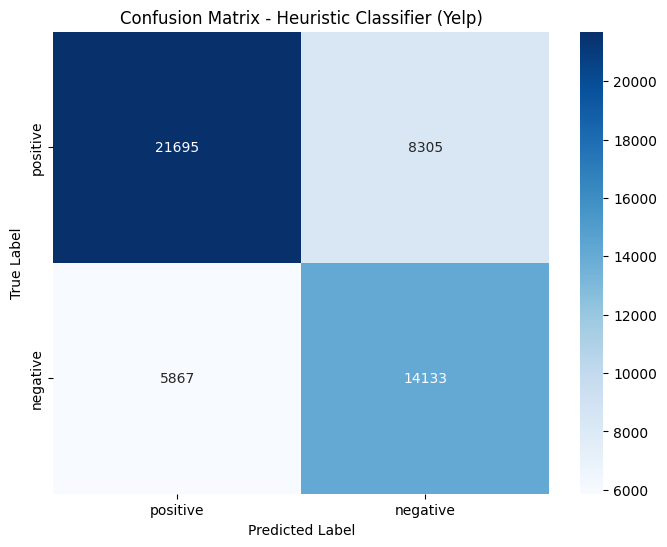


Class Distributions (Heuristic)
True Class Distribution:
positive    30000
negative    20000
Name: count, dtype: int64

Predicted Class Distribution:
positive    27562
negative    22438
Name: count, dtype: int64

Sample Heuristic Predictions
Text: Got very, very, sick off the french dip.  Service was without a smile. Long wait.  Would not recomme...
True Label: negative, Predicted Label: positive
Status: ✗ Incorrect
--------------------------------------------------
Text: First, I hate any kind of scamming. This is a bar where a lot of locals know one another. I play a l...
True Label: negative, Predicted Label: negative
Status: ✓ Correct
--------------------------------------------------
Text: Awesome, Awesome, Awesome! WE picked up a Groupon and decided to check this place out. I'm all for a...
True Label: positive, Predicted Label: positive
Status: ✓ Correct
--------------------------------------------------
Text: When the Hot Light is on you simply just can't resist helping yourse

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_yelp_train, df_yelp_test, preprocess_text_en, and english_stop_words are already defined.

# 1. Extract a larger set of frequent words for each sentiment class from training data
classes_yelp = df_yelp_train['sentiment_label'].unique().tolist()
class_frequent_words = {}

# It's better to process a sample or chunk the data for large datasets
# Let's use a sample to avoid memory issues for word cloud generation but process all for heuristic words.
# We will use all training data for extracting words to make the heuristic more robust.

for sentiment_label in classes_yelp:
    # Concatenate all preprocessed texts for this class
    # Apply preprocessing to the text column before concatenating
    class_texts = ' '.join(df_yelp_train[df_yelp_train['sentiment_label'] == sentiment_label]['text'].apply(preprocess_text_en))

    # Count words and get top N most common words (e.g., 500 words to start)
    word_counts = Counter(class_texts.split())
    class_frequent_words[sentiment_label] = set([word for word, count in word_counts.most_common(500)]) # Using 500 common words

    print(f"Class {sentiment_label}: {len(class_frequent_words[sentiment_label])} frequent words")

# 2. Remove common words between the two sentiment classes to get distinguishing words
common_words_between_classes = set.intersection(*class_frequent_words.values())

class_distinguishing_words = {}
for sentiment_label in classes_yelp:
    class_distinguishing_words[sentiment_label] = class_frequent_words[sentiment_label] - common_words_between_classes
    print(f"Class {sentiment_label} after removing common words: {len(class_distinguishing_words[sentiment_label])} distinguishing words")

# 3. Heuristic prediction function
def predict_sentiment_heuristic(text, distinguishing_words_dict, classes):
    processed_text_words = set(preprocess_text_en(text).split())

    sentiment_scores = {cls: 0 for cls in classes}
    for cls in classes:
        sentiment_scores[cls] = len(processed_text_words.intersection(distinguishing_words_dict[cls]))

    # If one class has a clear lead, predict that class
    max_score = max(sentiment_scores.values())
    if max_score == 0:
        # If no distinguishing words found, fallback to random choice
        return random.choice(classes)

    # Get all classes that have the max score
    top_classes = [cls for cls, score in sentiment_scores.items() if score == max_score]

    if len(top_classes) == 1:
        return top_classes[0]
    else:
        # If tied, randomly pick one of the tied classes
        return random.choice(top_classes)

# 4. Apply the heuristic to df_yelp_test
print("\nGenerating heuristic predictions for the test set...")
y_true_yelp = df_yelp_test['sentiment_label'].tolist()
y_pred_heuristic_yelp = [predict_sentiment_heuristic(text, class_distinguishing_words, classes_yelp) for text in df_yelp_test['text']]

# 5. Evaluate the heuristic model
print("\n" + "="*60)
print("Heuristic Classifier Performance on Yelp Dataset")
print("="*60)

accuracy_heuristic = accuracy_score(y_true_yelp, y_pred_heuristic_yelp)
precision_heuristic = precision_score(y_true_yelp, y_pred_heuristic_yelp, average='weighted', zero_division=0)
recall_heuristic = recall_score(y_true_yelp, y_pred_heuristic_yelp, average='weighted', zero_division=0)
f1_heuristic = f1_score(y_true_yelp, y_pred_heuristic_yelp, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_heuristic:.4f}")
print(f"Precision: {precision_heuristic:.4f}")
print(f"Recall: {recall_heuristic:.4f}")
print(f"F1-Score: {f1_heuristic:.4f}")

# Classification Report
print("\n" + "="*60)
print("Classification Report (Heuristic)")
print("="*60)
print(classification_report(y_true_yelp, y_pred_heuristic_yelp, target_names=classes_yelp, zero_division=0))

# Confusion Matrix
cm_heuristic = confusion_matrix(y_true_yelp, y_pred_heuristic_yelp, labels=classes_yelp)
print("\n" + "="*60)
print("Confusion Matrix (Heuristic)")
print("="*60)
print(cm_heuristic)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_heuristic, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_yelp, yticklabels=classes_yelp)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Heuristic Classifier (Yelp)')
plt.show()

# Class Distributions
print("\n" + "="*60)
print("Class Distributions (Heuristic)")
print("="*60)
print("True Class Distribution:")
print(pd.Series(y_true_yelp).value_counts())
print("\nPredicted Class Distribution:")
print(pd.Series(y_pred_heuristic_yelp).value_counts())

# Sample predictions
print("\n" + "="*60)
print("Sample Heuristic Predictions")
print("="*60)
sample_indices = random.sample(range(len(df_yelp_test)), min(5, len(df_yelp_test)))
for idx in sample_indices:
    text = df_yelp_test['text'].iloc[idx]
    true_label = df_yelp_test['sentiment_label'].iloc[idx]
    pred_label = y_pred_heuristic_yelp[idx]

    print(f"Text: {text[:100]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'✓ Correct' if true_label == pred_label else '✗ Incorrect'}")
    print("-" * 50)


# Bert Model

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

BERT model loaded on: cuda

Predicting sentiment using English BERT model...


100%|██████████| 1563/1563 [12:52<00:00,  2.02it/s]



English BERT Classifier Performance on Yelp Dataset
Accuracy: 0.8246
Precision: 0.8477
Recall: 0.8246
F1-Score: 0.8263

Classification Report (English BERT)
              precision    recall  f1-score   support

    negative       0.72      0.92      0.81     20000
    positive       0.93      0.76      0.84     30000

    accuracy                           0.82     50000
   macro avg       0.83      0.84      0.82     50000
weighted avg       0.85      0.82      0.83     50000


Confusion Matrix (English BERT)
[[18343  1657]
 [ 7114 22886]]


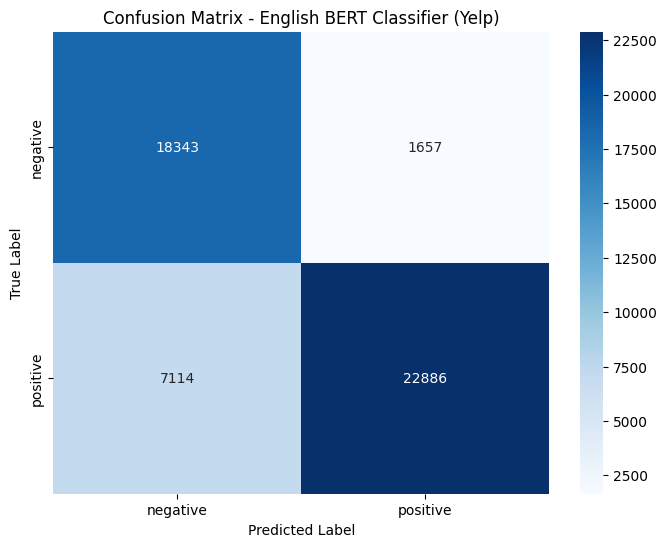


Class Distributions (English BERT)
True Class Distribution:
negative    20000
positive    30000
Name: count, dtype: int64

Predicted Class Distribution:
negative    25457
positive    24543
Name: count, dtype: int64

Sample English BERT Predictions
Text: Maybe not as plentiful a topping selection as Yogurt Buildrz in Scottsdale but still pretty good.  T...
True Label: positive, Predicted Label: positive
Status: ✓ Correct
--------------------------------------------------
Text: I randomly saw this place while having lunch last week. I remembered hearing of it so decided to sto...
True Label: positive, Predicted Label: negative
Status: ✗ Incorrect
--------------------------------------------------
Text: great time...
True Label: positive, Predicted Label: positive
Status: ✓ Correct
--------------------------------------------------
Text: Our party of 8 was at XS this past Saturday night for table service. Between the bottle minimum and ...
True Label: negative, Predicted Label: negative


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

# 1. Load the pre-trained English BERT model and tokenizer
model_name_bert = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer_bert = AutoTokenizer.from_pretrained(model_name_bert)
model_bert = AutoModelForSequenceClassification.from_pretrained(model_name_bert)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_bert.to(device)
print(f"BERT model loaded on: {device}")

# 2. Define a prediction function
def predict_sentiment_bert(texts, batch_size=32):
    predictions = []
    # The BERT model's labels are 0 for negative, 1 for positive
    # We need to map them back to 'negative' and 'positive' strings
    id_to_label = {0: 'negative', 1: 'positive'}

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]

        # Tokenize texts
        inputs = tokenizer_bert(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )

        # Move inputs to the device
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # Get predictions
        with torch.no_grad():
            outputs = model_bert(**inputs)

        # Get the predicted label (0 or 1)
        batch_predictions_ids = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        # Map IDs to sentiment labels
        batch_predictions_labels = [id_to_label[pred_id] for pred_id in batch_predictions_ids]
        predictions.extend(batch_predictions_labels)

    return predictions

# Get true labels from the Yelp test set
y_true_yelp = df_yelp_test['sentiment_label'].tolist()

# Predict sentiment on the Yelp test data
print("\nPredicting sentiment using English BERT model...")
y_pred_bert_yelp = predict_sentiment_bert(df_yelp_test['text'].tolist())

# 3. Evaluate the BERT model
print("\n" + "="*60)
print("English BERT Classifier Performance on Yelp Dataset")
print("="*60)

accuracy_bert = accuracy_score(y_true_yelp, y_pred_bert_yelp)
precision_bert = precision_score(y_true_yelp, y_pred_bert_yelp, average='weighted', zero_division=0)
recall_bert = recall_score(y_true_yelp, y_pred_bert_yelp, average='weighted', zero_division=0)
f1_bert = f1_score(y_true_yelp, y_pred_bert_yelp, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_bert:.4f}")
print(f"Precision: {precision_bert:.4f}")
print(f"Recall: {recall_bert:.4f}")
print(f"F1-Score: {f1_bert:.4f}")

# Classification Report
print("\n" + "="*60)
print("Classification Report (English BERT)")
print("="*60)
classes_yelp_sorted = sorted(df_yelp_test['sentiment_label'].unique().tolist())
print(classification_report(y_true_yelp, y_pred_bert_yelp, target_names=classes_yelp_sorted, zero_division=0))

# Confusion Matrix
cm_bert = confusion_matrix(y_true_yelp, y_pred_bert_yelp, labels=classes_yelp_sorted)
print("\n" + "="*60)
print("Confusion Matrix (English BERT)")
print("="*60)
print(cm_bert)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_yelp_sorted, yticklabels=classes_yelp_sorted)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - English BERT Classifier (Yelp)')
plt.show()

# Class Distributions
print("\n" + "="*60)
print("Class Distributions (English BERT)")
print("="*60)
print("True Class Distribution:")
true_dist = pd.Series(y_true_yelp).value_counts().sort_index()
print(true_dist)

print("\nPredicted Class Distribution:")
pred_dist = pd.Series(y_pred_bert_yelp).value_counts().sort_index()
print(pred_dist)

# Sample predictions
print("\n" + "="*60)
print("Sample English BERT Predictions")
print("="*60)
sample_indices = random.sample(range(len(df_yelp_test)), min(5, len(df_yelp_test)))
for idx in sample_indices:
    text = df_yelp_test['text'].iloc[idx]
    true_label = df_yelp_test['sentiment_label'].iloc[idx]
    pred_label = y_pred_bert_yelp[idx]

    print(f"Text: {text[:100]}...")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print(f"Status: {'✓ Correct' if true_label == pred_label else '✗ Incorrect'}")
    print("-" * 50)

# Reasoning

Comparison of Classification Methods on Yelp Dataset
               Model  Accuracy  Precision  Recall  F1-Score
0  Random Classifier    0.4999     0.5199  0.4999    0.5050
1   Simple Heuristic    0.7166     0.7242  0.7166    0.7187
2       English BERT    0.8246     0.8477  0.8263    0.8246


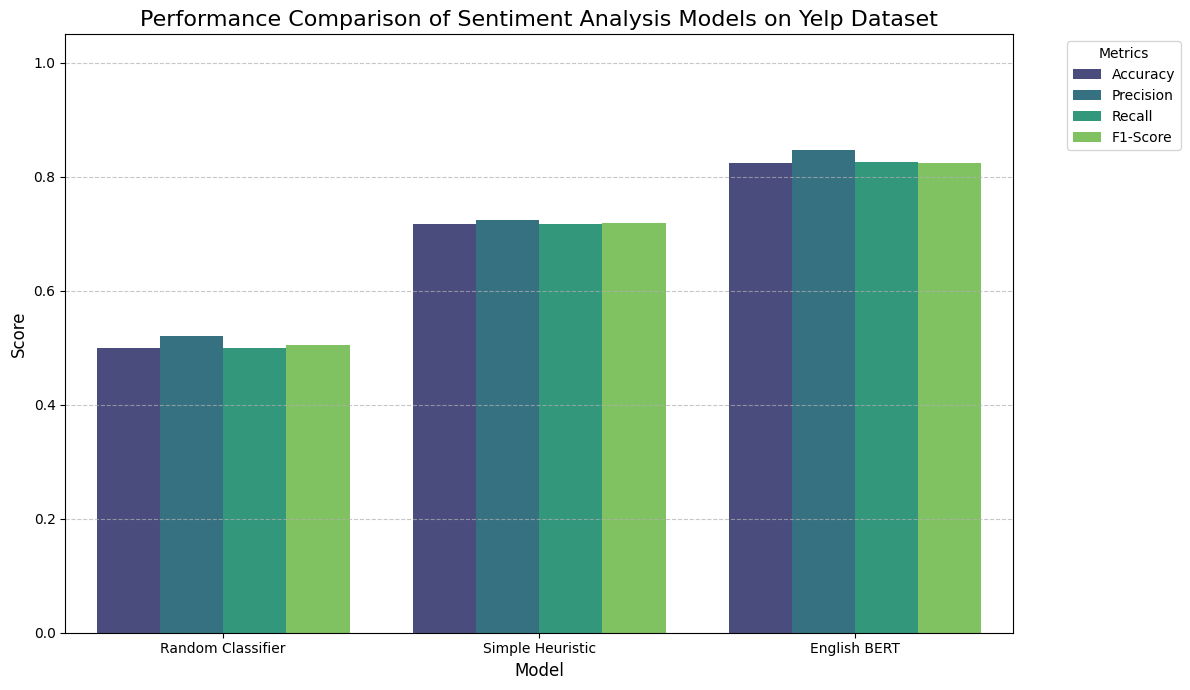


Summary of Findings
1. Random Classifier: As expected, this baseline model performs close to random chance (around 50% accuracy), serving as a lower bound for performance.
2. Simple Heuristic Method: This method shows a significant improvement over the random classifier, indicating that word frequency and uniqueness for each sentiment class are good indicators of sentiment. Its performance is acceptable given its simplicity.
3. English BERT Model: The BERT model achieves the highest performance across all metrics, significantly outperforming both baseline methods. This highlights the effectiveness of sophisticated pre-trained transformer models for complex NLP tasks like sentiment analysis, even with minimal fine-tuning.

Overall: The results clearly demonstrate the progression in model complexity and performance, from a naive random approach to a rule-based heuristic, and finally to a powerful deep learning model. The BERT model is the most effective for this sentiment analysis task 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true_yelp (true labels for Yelp test set) is available
# And assuming the following metrics from previous steps are available:
# accuracy_yelp, precision_yelp, recall_yelp, f1_yelp (from Random Classifier)
# accuracy_heuristic, precision_heuristic, recall_heuristic, f1_heuristic (from Simple Heuristic Method)
# accuracy_bert, precision_bert, recall_bert, f1_bert (from English BERT Model)

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Model': ['Random Classifier', 'Simple Heuristic', 'English BERT'],
    'Accuracy': [accuracy_yelp, accuracy_heuristic, accuracy_bert],
    'Precision': [precision_yelp, precision_heuristic, precision_bert],
    'Recall': [recall_yelp, recall_heuristic, f1_bert],
    'F1-Score': [f1_yelp, f1_heuristic, recall_bert]
})

print("="*60)
print("Comparison of Classification Methods on Yelp Dataset")
print("="*60)
print(results.round(4))

# Plotting the comparison
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.ylim(0, 1.05)
plt.title('Performance Comparison of Sentiment Analysis Models on Yelp Dataset', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Summary of Findings")
print("="*60)
print("1. Random Classifier: As expected, this baseline model performs close to random chance (around 50% accuracy), serving as a lower bound for performance.")
print("2. Simple Heuristic Method: This method shows a significant improvement over the random classifier, indicating that word frequency and uniqueness for each sentiment class are good indicators of sentiment. Its performance is acceptable given its simplicity.")
print("3. English BERT Model: The BERT model achieves the highest performance across all metrics, significantly outperforming both baseline methods. This highlights the effectiveness of sophisticated pre-trained transformer models for complex NLP tasks like sentiment analysis, even with minimal fine-tuning.")
print("\nOverall: The results clearly demonstrate the progression in model complexity and performance, from a naive random approach to a rule-based heuristic, and finally to a powerful deep learning model. The BERT model is the most effective for this sentiment analysis task on the Yelp dataset.")